To run this code, each of the appropriate training and testing datasets must be loaded into the colab directory. Skips the first 16 (mostly) empty bytes, then reads data into np array.

In [1]:
import gzip
import numpy as np
trainX = gzip.open('/content/train-images-idx3-ubyte.gz', 'r')
image_size = 28

import numpy as np
trainX.read(16)
buf = trainX.read()
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(60000, image_size, image_size)
print(data.shape)

(60000, 28, 28)


Skips the first 8 useless bytes in labels dataset, then reads label data into np array

In [2]:
f = gzip.open('/content/train-labels-idx1-ubyte.gz','r')
f.read(8) 
buf = f.read(60000)
labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
print(labels.shape)

(60000,)


Ascertains how many of each label is in dataset. Declares empty n * 28 * 28 array for each label, then reads the appropriate 28*28 images into each dataset.

In [3]:
zeroCount = 0
for i in range(0,60000):
  if labels[i] == 0:
    zeroCount += 1
zeros = np.zeros((zeroCount,28,28))
zeroI = 0
oneCount = 0
for i in range(0,60000):
  if labels[i] == 1:
    oneCount += 1
ones = np.zeros((oneCount,28,28))
twoCount = 0
for i in range(0,60000):
  if labels[i] == 2:
    twoCount += 1
twos = np.zeros((twoCount,28,28))
threeCount = 0
for i in range(0,60000):
  if labels[i] == 3:
    threeCount += 1
threes = np.zeros((threeCount,28,28))
fourCount = 0
for i in range(0,60000):
  if labels[i] == 4:
    fourCount += 1
fours = np.zeros((fourCount,28,28))
fiveCount = 0
for i in range(0,60000):
  if labels[i] == 5:
    fiveCount += 1
fives = np.zeros((fiveCount,28,28))
sixCount = 0
for i in range(0,60000):
  if labels[i] == 6:
    sixCount += 1
sixes = np.zeros((sixCount,28,28))
sevenCount = 0
for i in range(0,60000):
  if labels[i] == 7:
    sevenCount += 1
sevens = np.zeros((sevenCount,28,28))
eightCount = 0
for i in range(0,60000):
  if labels[i] == 8:
    eightCount += 1
eights = np.zeros((eightCount,28,28))
nineCount = 0
for i in range(0,60000):
  if labels[i] == 9:
    nineCount += 1
nines = np.zeros((nineCount,28,28))
zeroI = 0
nineI = 0
eightI = 0
sevenI = 0
sixI = 0
fiveI = 0
threeI = 0
fourI = 0
twoI = 0
oneI = 0
for i in range(0,60000):
  if labels[i] == 0:
    zeros[zeroI] = data[i]
    zeroI+=1
  if labels[i] == 1:
    ones[oneI] = data[i]
    oneI+=1
  if labels[i] == 2:
    twos[twoI] = data[i]
    twoI+=1
  if labels[i] == 3:
    threes[threeI] = data[i]
    threeI+=1
  if labels[i] == 4:
    fours[fourI] = data[i]
    fourI+=1
  if labels[i] == 5:
    fives[fiveI] = data[i]
    fiveI+=1
  if labels[i] == 6:
    sixes[sixI] = data[i]
    sixI+=1
  if labels[i] == 7:
    sevens[zeroI] = data[i]
    sevenI+=1
  if labels[i] == 8:
    eights[eightI] = data[i]
    eightI+=1
  if labels[i] == 9:
    nines[nineI] = data[i]
    nineI+=1


Calculates mean for each pixel position and standard deviation for each pixel for each label.

In [4]:
print(zeros.shape)
meanZero = np.mean(zeros, axis = 0)
stdZero = np.std(zeros, axis = 0)
meanOnes = np.mean(ones, axis = 0)
stdOnes = np.std(ones, axis = 0)
meanTwo = np.mean(twos, axis = 0)
stdTwo = np.std(twos, axis = 0)
meanThree = np.mean(threes, axis = 0)
stdThree = np.std(threes, axis = 0)
meanFour = np.mean(fours, axis = 0)
stdFour = np.std(fours, axis = 0)
meanFive = np.mean(fives, axis = 0)
stdFive = np.std(fives, axis = 0)
meanSix = np.mean(sixes, axis = 0)
stdSix = np.std(sixes, axis = 0)
meanSeven = np.mean(sevens, axis = 0)
stdSeven = np.std(sevens, axis = 0)
meanEight = np.mean(eights, axis = 0)
stdEight = np.std(eights, axis = 0)
meanNine = np.mean(nines, axis = 0)
stdNine = np.std(nines, axis = 0)
means = [meanZero, meanOnes, meanTwo, meanThree, meanFour, meanFive, meanSix, meanSeven, meanEight, meanNine]
stds = [stdZero,stdOnes, stdTwo, stdThree, stdFour, stdFive, stdSix, stdSeven, stdEight, stdNine]

(5923, 28, 28)


Plots each 28*28 avg array using grayscale

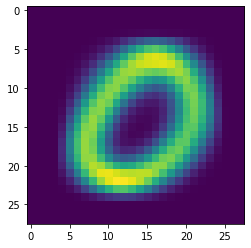

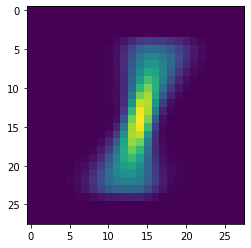

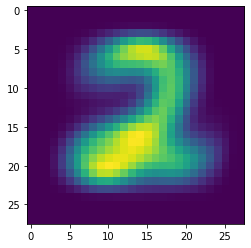

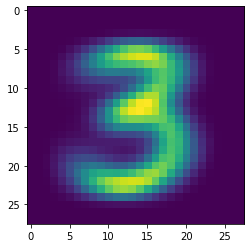

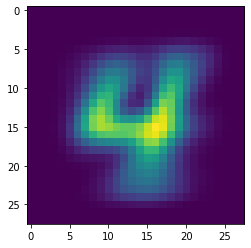

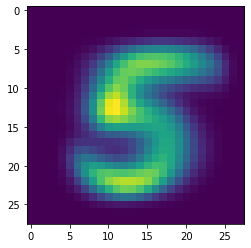

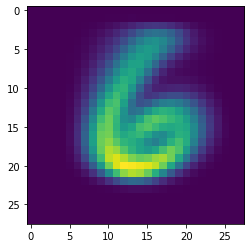

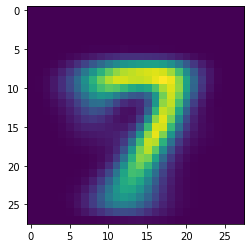

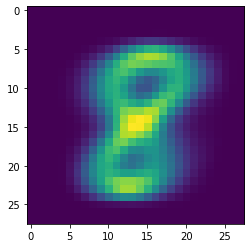

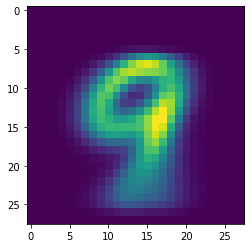

<Figure size 432x288 with 0 Axes>

In [5]:
from matplotlib.pyplot import imshow, figure, xlabel, ylabel
for i in means:
  imshow(i)
  figure()

Plots each 28*28 std array using grayscale

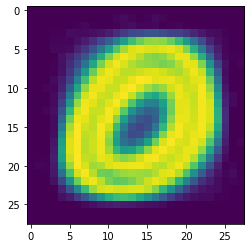

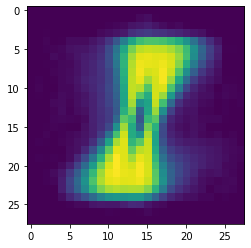

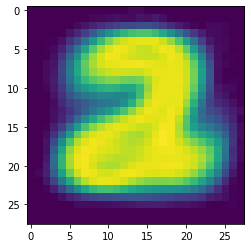

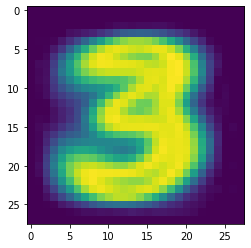

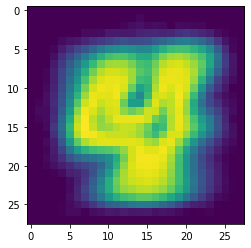

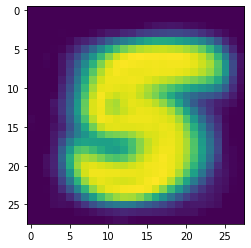

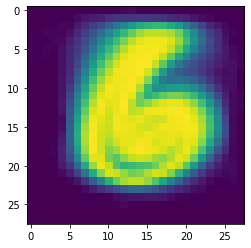

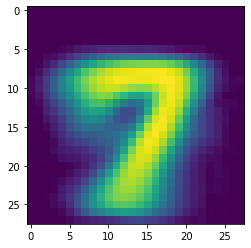

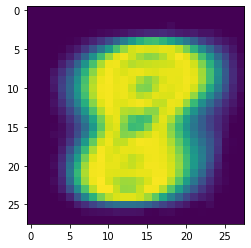

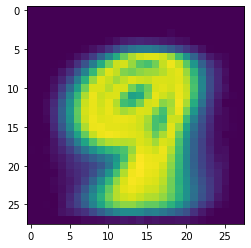

<Figure size 432x288 with 0 Axes>

In [6]:
for j in stds:
  imshow(j)
  figure()

sets the Random seed to get consistent samples for discriminant function training

In [7]:
from math import log
import random
random.seed(585)

Takes the means of across digits excluding one digit at a time

In [8]:
means = np.array(means)
noZero = np.delete(means, 0, axis = 0)
nonMeanZero = np.mean(noZero, axis = 0)
noOne = np.delete(means, 1, axis = 0)
nonMeanOne = np.mean(noOne, axis = 0)
noTwo = np.delete(means, 2, axis = 0)
nonMeanTwo = np.mean(noTwo, axis = 0)
noThree = np.delete(means, 3, axis = 0)
nonMeanThree = np.mean(noThree, axis = 0)
noFour = np.delete(means, 4, axis = 0)
nonMeanFour = np.mean(noFour, axis = 0)
noFive = np.delete(means, 5, axis = 0)
nonMeanFive = np.mean(noFive, axis = 0)
noSix = np.delete(means, 6, axis = 0)
nonMeanSix = np.mean(noSix, axis = 0)
noSeven = np.delete(means, 7, axis = 0)
nonMeanSeven = np.mean(noSeven, axis = 0)
noEight = np.delete(means, 8, axis = 0)
nonMeanEight = np.mean(noEight, axis = 0)
noNine = np.delete(means, 9, axis = 0)
nonMeanNine = np.mean(noNine, axis = 0)

Imports testing data the same way training data was imported.

In [9]:
testX = gzip.open('/content/t10k-images-idx3-ubyte.gz', 'r')
image_size = 28

testX.read(16)
bufftest = testX.read()
testdata = np.frombuffer(bufftest, dtype=np.uint8).astype(np.float32)
testdata = testdata.reshape(10000, image_size, image_size)
print(testdata.shape)
f = gzip.open('/content/t10k-labels-idx1-ubyte.gz','r')
f.read(8) 
buftest = f.read(10000)
testlabels = np.frombuffer(buftest, dtype=np.uint8).astype(np.int64)
print(testlabels.shape)

(10000, 28, 28)
(10000,)


function that gathers a sample of training data that does not include the desired label

In [10]:
from random import randrange
def sampler(data, size, label, labels):
  toReturn = [0]*size
  i = 0
  while i < size:
    tryto = randrange(start = 0,stop = 60000)
    if tryto not in toReturn and labels[tryto] != label:
      toReturn[i] = tryto
      i+=1
  return toReturn

Function that gathers a sample of training data of the desired label

In [11]:

def sampler2(data, size, label, labels):
  toReturn = [0]*size
  i = 0
  while i < size:
    tryto = randrange(start = 0,stop = 60000)
    if tryto not in toReturn and labels[tryto] == label:
      toReturn[i] = tryto
      i+=1
  return toReturn

Function that sets the W, N, and B variables for each discriminant function assuming that each covariance matrix is different across labels. HyperQuadratic boundary drawer.

In [12]:
def discrimFunc(coolMatrix, label, labels, num, dmean, umean):
  data = coolMatrix.reshape(60000, 784)
  newlabels = np.zeros(len(labels))
  desiredMatrix = np.zeros((100,784))
  undesiredMatrix = np.zeros((100,784))
  desiredMatrix = data[sampler2(data, 300, label, labels)]
  undesiredMatrix = data[sampler(data, 300, label, labels)]
  covMatrixD = np.cov(desiredMatrix.T) + .02*np.identity(784)
  covMatrixU = np.cov(undesiredMatrix.T) + .02*np.identity(784)
  W = .5*np.linalg.inv(covMatrixU) - .5*np.linalg.inv(covMatrixD)
  N = -1*np.matmul(np.linalg.inv(covMatrixU), umean) + np.matmul(np.linalg.inv(covMatrixD), dmean)
  print((np.log(np.linalg.det(covMatrixD)), np.log(np.linalg.det(covMatrixU))))
  B1 = -.5*(np.matmul(np.matmul(umean.T, np.linalg.inv(covMatrixU)), umean)+ np.log(np.linalg.det(covMatrixU)))+log(num/11000)+.5
  B2 = -.5*(np.matmul(np.matmul(dmean.T, np.linalg.inv(covMatrixD)), dmean)+ np.log(np.linalg.det(covMatrixD)))+log(1-num/11000)+.5
  B = B2-B1
  return(W,N,B)

Collects the B,N, and W parameters for each discriminant function and stores them in lists

In [13]:
numList = [zeroCount, oneCount, twoCount, threeCount, fourCount, fiveCount, sixCount, sevenCount, eightCount, nineCount]
dmeanList = [meanZero, meanOnes, meanTwo, meanThree, meanFour, meanFive, meanSix, meanSeven, meanEight, meanNine]
umeanList = [nonMeanZero, nonMeanOne, nonMeanTwo, nonMeanThree, nonMeanFour, nonMeanFive, nonMeanSix, nonMeanSeven, nonMeanEight, nonMeanNine]
BList = [0]*10
NList = []
WList = []
for i in range(10):
  triple = discrimFunc(data, i, labels, numList[i], dmeanList[i].reshape(784), umeanList[i].reshape(784))
  BList[i] = triple[2]
  NList.append(triple[1])
  WList.append(triple[0])

(136.4948848086199, 262.3676415181075)
(-661.2711066064205, 303.9193244128625)
(260.9901439468102, 261.5709541102527)
(183.90981410954626, 249.31316566200024)
(140.12305284306024, 291.07645534835586)
(197.68795556775362, 270.2381326254293)
(64.06635090990405, 271.206038031555)
(34.92474247823258, 262.09724742330224)
(185.17941229771398, 266.4039835159036)
(-0.9043231104772813, 273.6659275467386)


Using Naive Bayes Decision Making to decide labels (taking the maximum discriminant function result and using that as its decision), and scores the results using (0,1) loss function. This model scores 83% accuracy

In [14]:
testData = testdata.reshape(10000,784)
predictLabels = np.zeros(10000)
index = 0
for i in range(10000):
  toTest = testData[i].reshape(784,1)
  scores = [0]*10
  for j in range(10):
    scores[j] = np.matmul(np.matmul(toTest.T,WList[j]),toTest) + np.matmul(NList[j].T,toTest) + BList[j]
  winner = max(scores)
  prediction = scores.index(winner)
  predictLabels[i] = prediction

score = 0
for i in range(10000):
  if int(predictLabels[i]) == testlabels[i]:
    score += 1
print(score/10000)

0.8348


creates the confusion matrix of testing results

In [15]:
confusion = np.zeros((10,10))
for k in range(10000):
  confusion[int(predictLabels[k])][testlabels[k]] += 1
print(confusion.astype(int))

[[ 943    0   24   20    4   19   32    0   16    7]
 [   2 1107   36   52   23   47   14   18  104   16]
 [   2    5  832   13   12    3    4   10    9    2]
 [   6    2   51  784    4   52    0   10   26   10]
 [   1    6    8    0  781    3    5   25    6   34]
 [   3    0    2   38    3  624   14    0   17    1]
 [   3    5   14    2    8   23  880    0    6    0]
 [   2    0    7    9   20    7    0  805    5   81]
 [  16   10   49   57   11   87    9   21  749   15]
 [   2    0    9   35  116   27    0  139   36  843]]


Makes a janky heatmap of the confusion matrix

Text(0, 0.5, 'Predicted Labels')

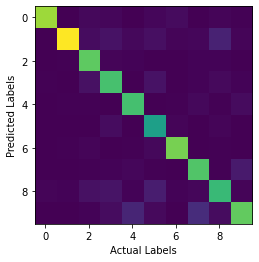

In [16]:
imshow(confusion)
xlabel("Actual Labels")
ylabel('Predicted Labels')

While this model doesn't reach the low levels of error shown on the MNIST website there are a couple reasons for this. They likely have significantly better methods of cross validation when training the model, and also likely have much more computing power, which likely allows them to train more images in each sample. More data always leads to improved results, so the fact that the discriminant functions were only trained on 600 images each and reached 83% is a testament to the strength of Naive Bayes classification. Overall I felt quite uncomfortable with my MAP adjustments and I'm sure the academic models shown on the MNISK website have much more fine-tuned adjustments